In [812]:
# Import universal packages:
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import time
from matplotlib import animation
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
import time
import matplotlib.animation as animation
from scipy.optimize import curve_fit

# The model

In [1170]:
%run GameOfCloud.py
%run Plotting_GameOfCloud.py
%run EnsembleRuns_GameOfCloud.py

<Figure size 432x288 with 0 Axes>

# Run multiple days of DIU and plot

In [1166]:
ndays = 21

x, Tns, counter,trop_temp_saved = gameofcloud(ndays, DIU=True, persistence='yes', branching=False, Tns_branch=False)


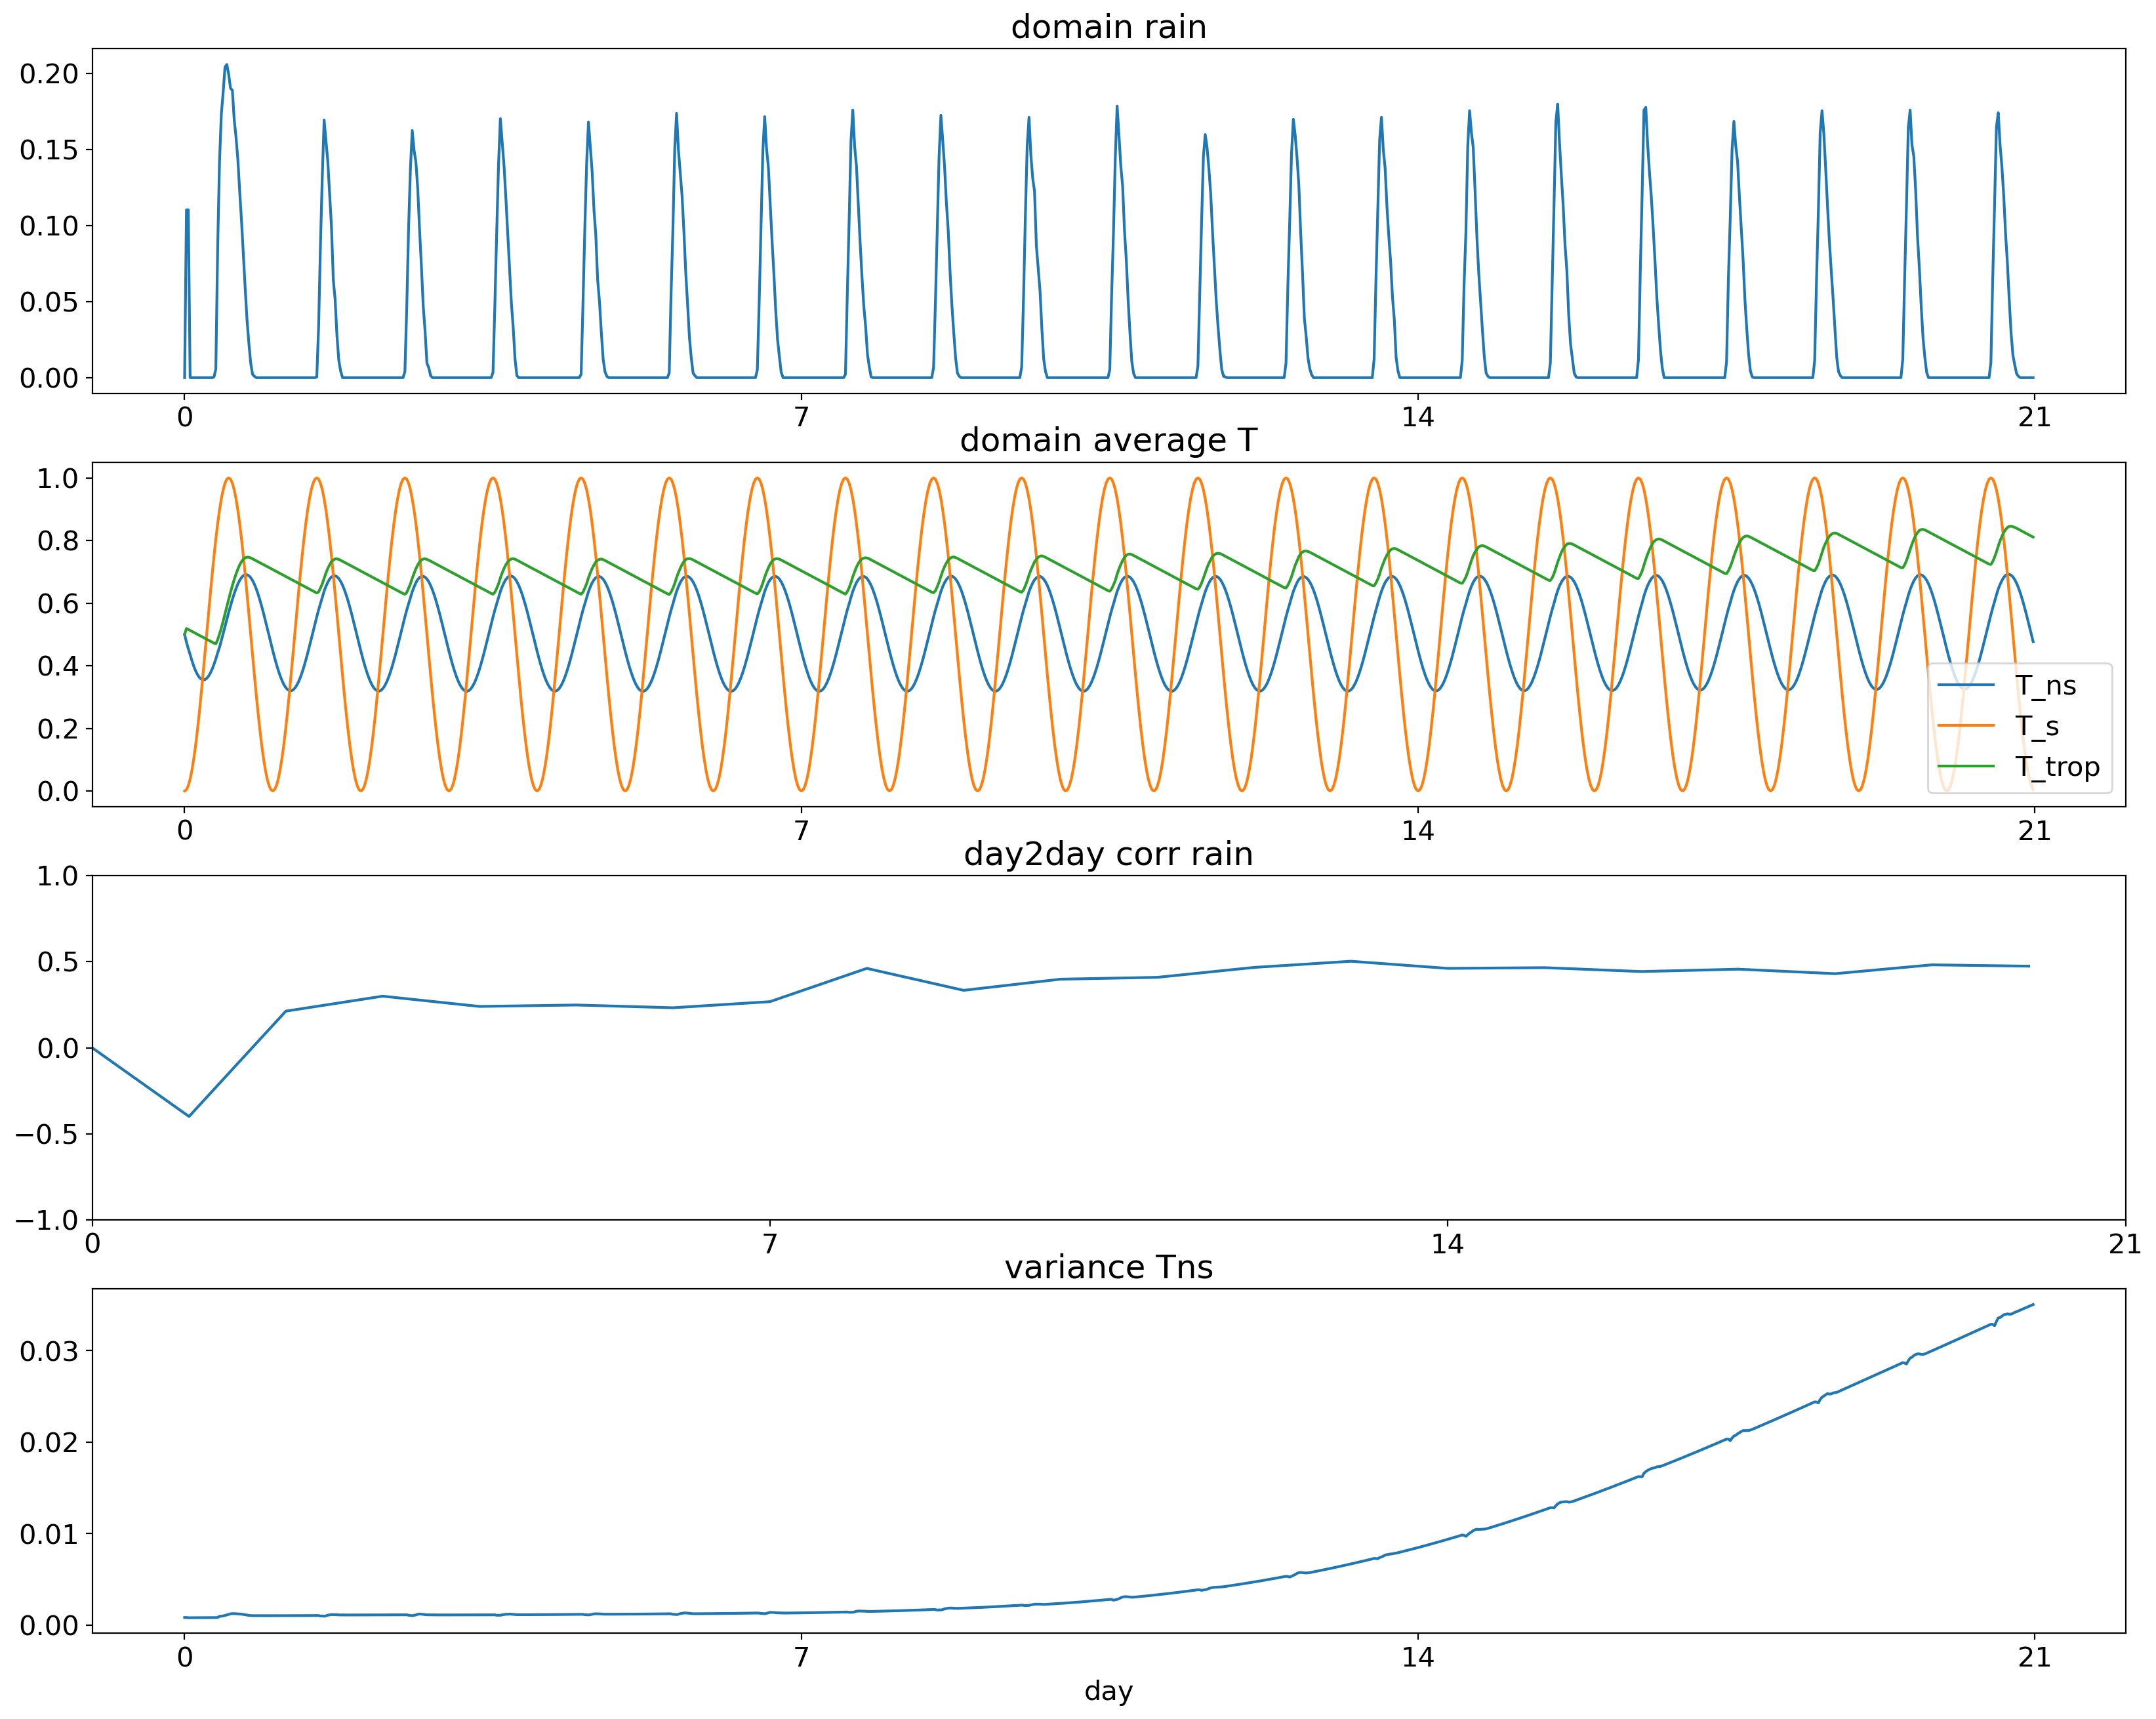

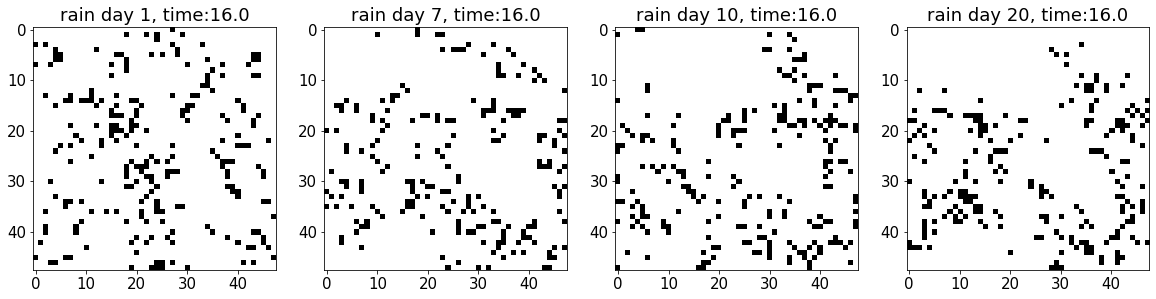

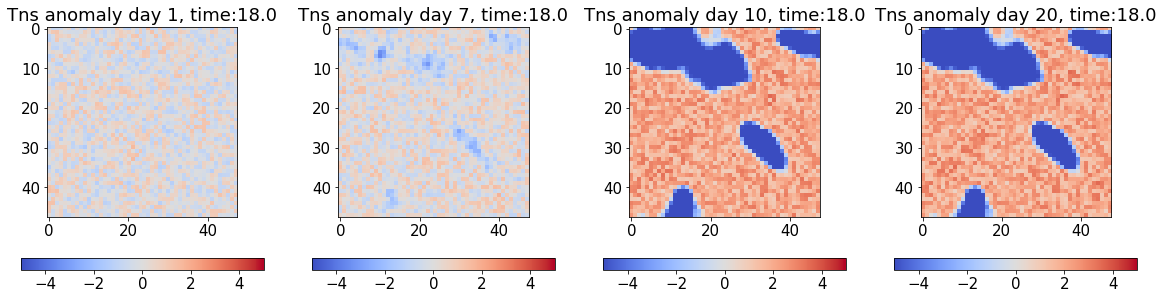

In [1167]:
plot_gameofcloud(True, N_steps_day, ndays, Tns, x, trop_temp_saved)

# Run OCEAN and plot


In [1168]:
%matplotlib inline
ndays_ocean = 21

x_ocean, Tns_ocean, counter_ocean, trop_temp_saved_ocean = gameofcloud(ndays_ocean, DIU=False,persistence='yes', branching=False, Tns_branch=False) 

# set branching=True and Tns_branch=Tns[-1] to branch from last step of DIU

<Figure size 432x288 with 0 Axes>

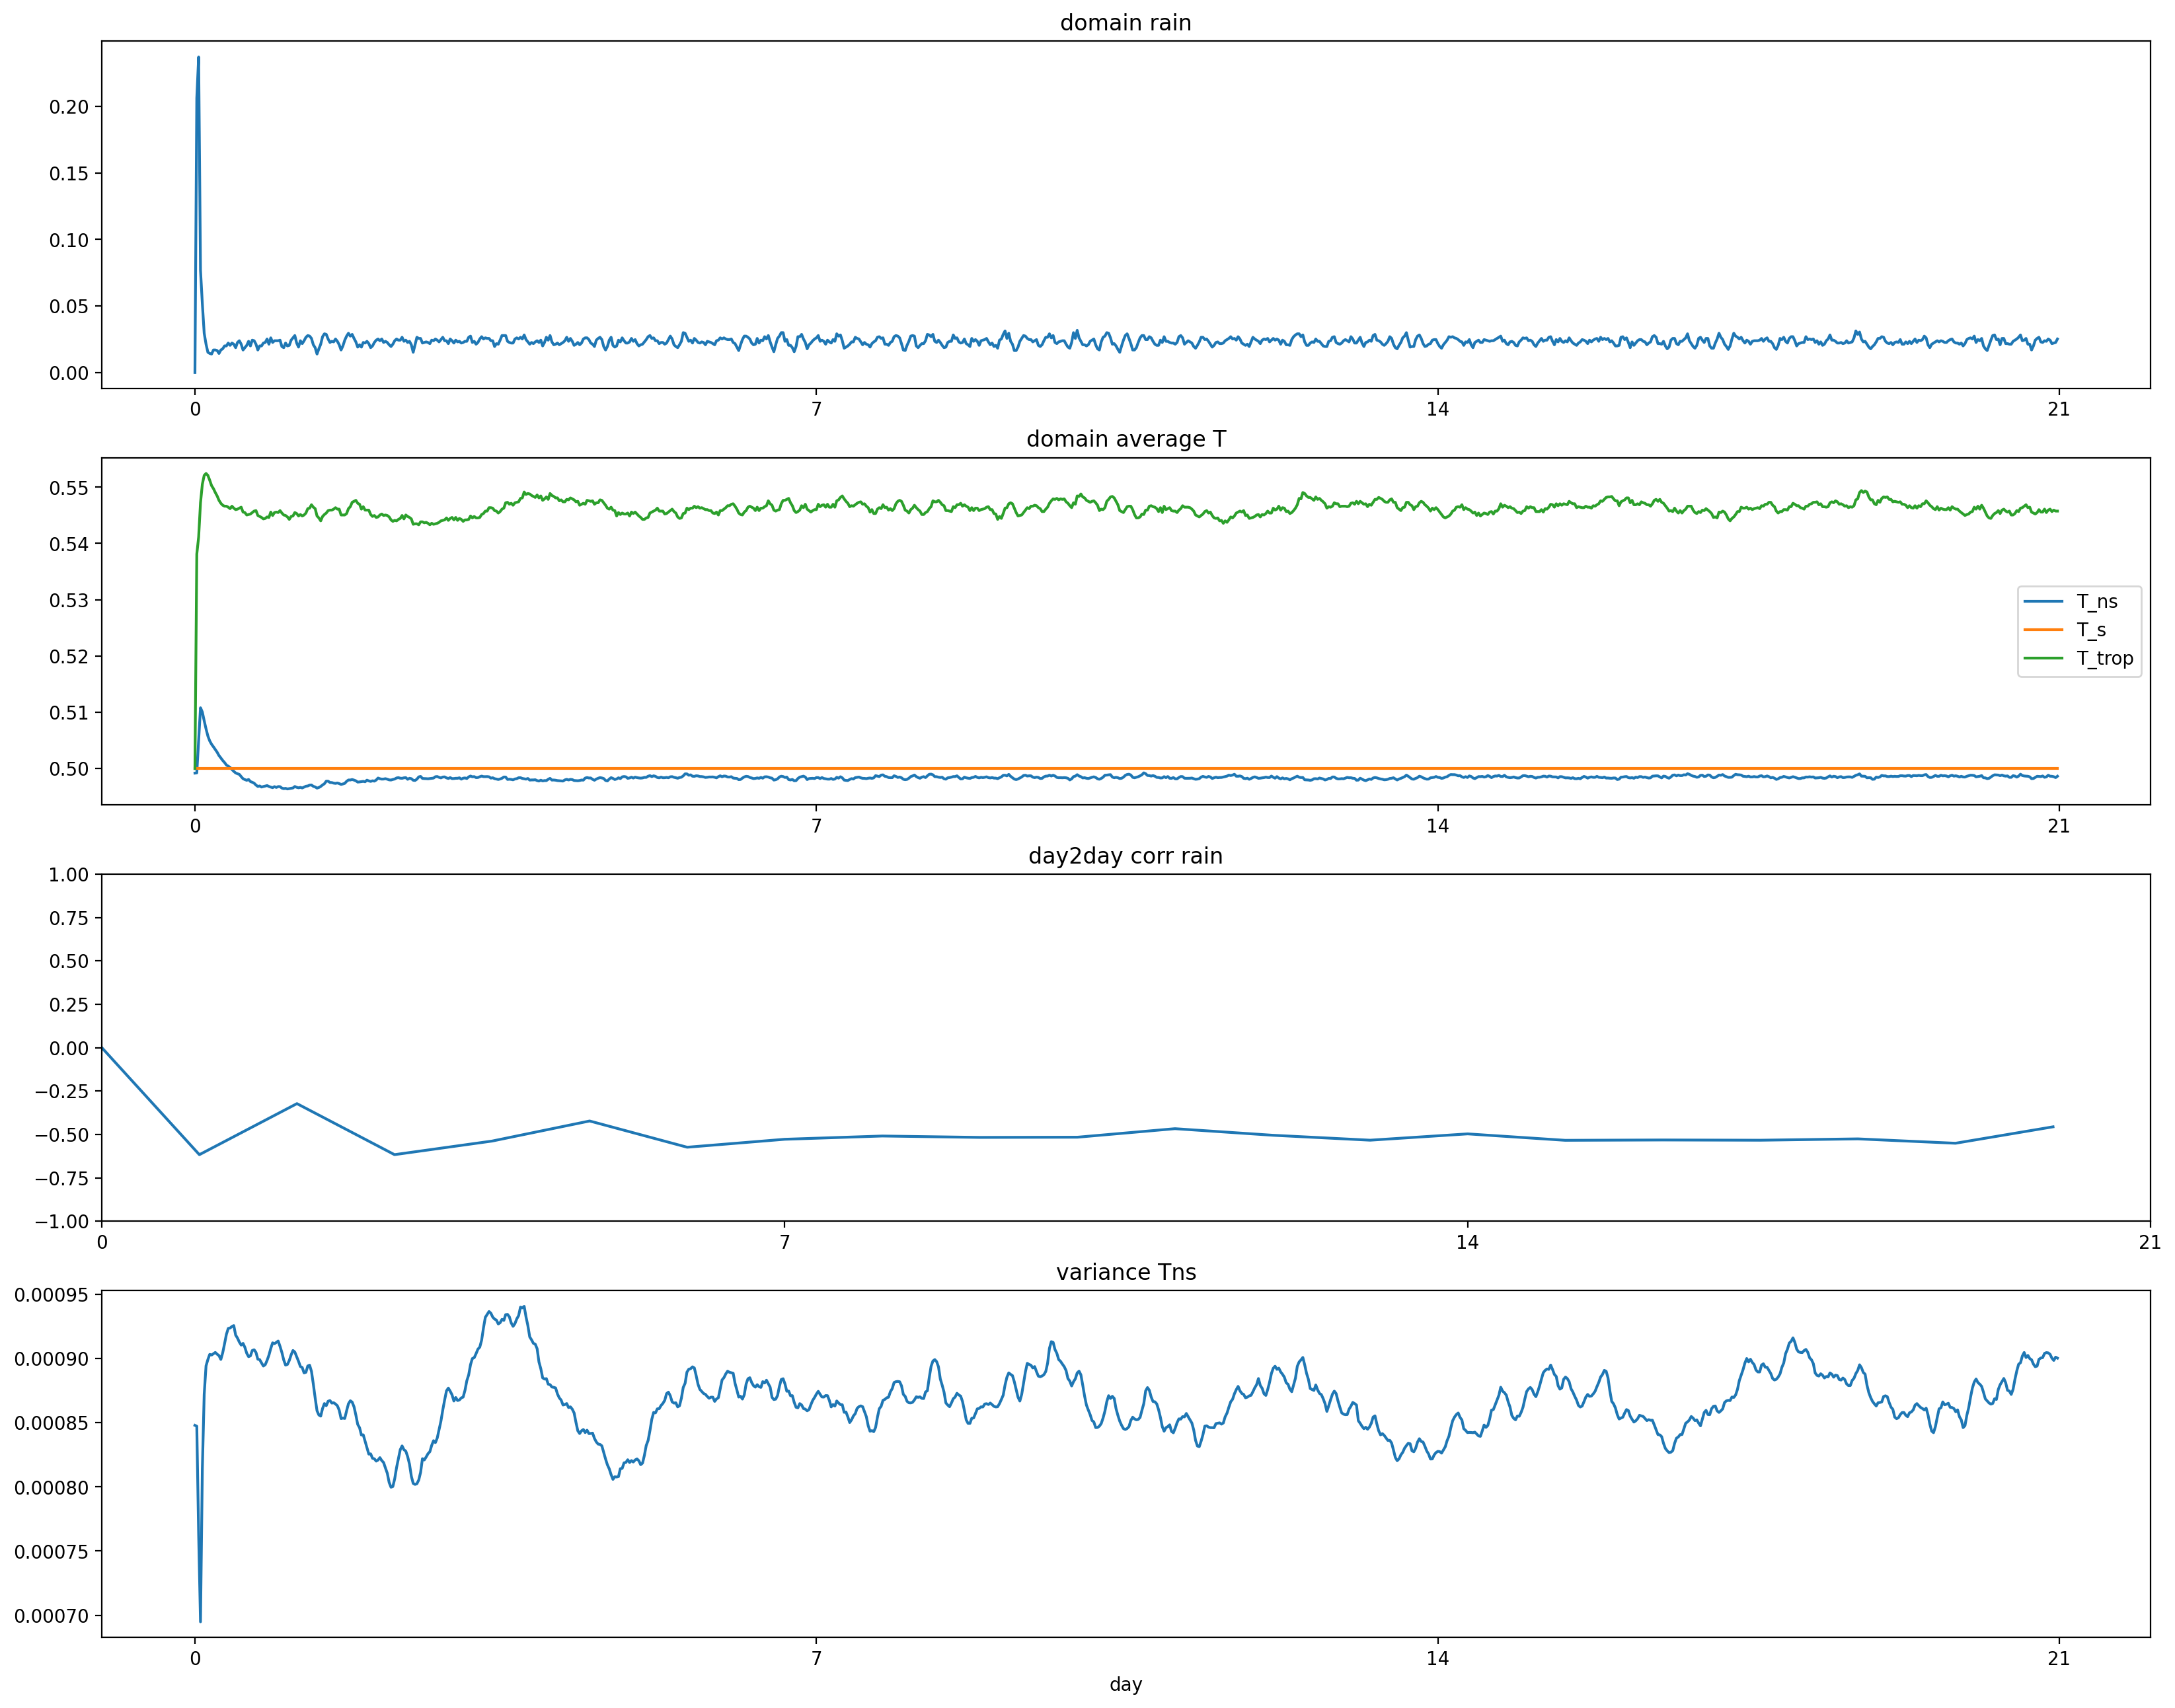

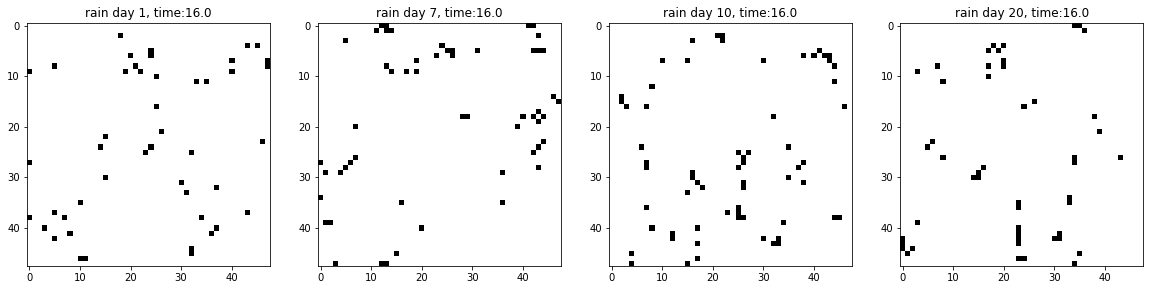

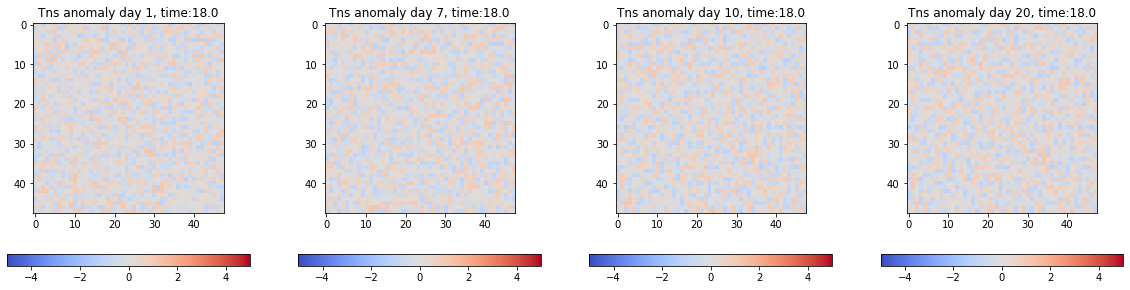

In [1172]:
plot_gameofcloud(False, N_steps_day, ndays_ocean, Tns_ocean, x_ocean, trop_temp_saved_ocean)

# Run ensemble of DIU + OCEAN + OCEAN branches, and plot

## NOTE: takes a while to run

In [ ]:
ensemble_runs = 10
days1 = 28
days2 = 42
ndays              = days1 + days2
ndays_ocean        = days1 + days2
ndays_oceanBRANCH  = days2
daybranch1         = 5
daybranch2          = 28

(x, Tns, 
 x_ocean, Tns_ocean, 
 x_oceanBRANCH1, Tns_oceanBRANCH1, 
 x_oceanBRANCH2, Tns_oceanBRANCH2,
 diu, diu_std,
 ocean, ocean_std, 
 branch1, branch1_std, 
 branch2, branch2_std, 
 diu_var, diu_var_std, 
 ocean_var, ocean_var_std, 
 branch1_var, branch1_var_std, 
 branch2_var, branch2_var_std) = ensemble_gameofcloud(ensemble_runs,days1,days2,daybranch1,daybranch2)

In [ ]:

plot_branches_all_spread(diu, diu_std, ocean, ocean_std, branch1, branch1_std, branch2, branch2_std, 
                         'day2daycorr', days1, days2, daybranch1=daybranch1, daybranch2=daybranch2, spread='yes', log='no')

plot_branches_all_spread(diu_var[::], diu_var_std[::], ocean_var[::], ocean_var_std[::], branch1_var[::], branch1_var_std[::], branch2_var[::], branch2_var_std[::], 
                         'Norm. Spatial Variance of Tns', days1, days2, daybranch1=daybranch1, daybranch2=daybranch2, spread='yes', log='yes')



In [ ]:
plotdayOCEAN = 41
plotdayDIU = 13
plotdayBRANCH2 = 41
plotdayDIU_2 = 41

%run EnsembleRuns_GameOfCloud.py
plot_snapshots(x,Tns,
               x_ocean,Tns_ocean,
               x_oceanBRANCH2,Tns_oceanBRANCH2, 
               daybranch2,
               plotdayOCEAN, plotdayDIU, 
               plotdayBRANCH2, plotdayDIU_2)

In [ ]:
plot_diurnalcycle(x, Tns, trop_temp_saved, x_ocean, Tns_ocean, trop_temp_saved_ocean)